In [1]:
import pandas as pd
import numpy as np
import nltk
import lxml.html
import re
import string
import gensim
import matplotlib.pyplot as plt 
from textacy import preprocessing
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')  
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
import swifter
import random
import re

import warnings
warnings.filterwarnings('ignore')

/home/rahul/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-01-07 16:44:07.452710: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-07 16:44:08.719898: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-07 16:44:08.720031: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-01-07 16:

In [2]:
# reading path 
path1 = r'/home/rahul/bikram sir/text_classification_corpus/cybersecurity_tweets.csv'
path2 = r'/home/rahul/bikram sir/text_classification_corpus/not_cybersecurity_tweets.csv'

In [3]:
# reading two csv files
data1 = pd.read_csv(path1)
data2 = pd.read_csv(path2)

# using merge function by setting how='outer'
df = pd.merge(data1, data2,
              how='outer')


In [4]:
# displaying result
df

,text,label
0,#AI Robo-Advisers and the Future of Financial ...,1
1,Hackers causing havoc on Mexican banking syste...,1
2,CVE-2019-13127 An issue was discovered in mxGr...,1
3,How to protect your online identity #labourcyb...,1
4,Forensic Acquisition - Shadow Cyber Sec https...,1
...,...,...
399995,Attackers Test Weak Passwords in Purple Fox Ma...,0
399996,Aviso para los usuarios de correo de @AytoMurc...,0
399997,NPM had an obfuscated birthday-like easter egg...,0
399998,CPUの脆弱性「Spectre」に対応してAMDがリリースしたパッチに問題があることをInt...,0


In [5]:
# df.dtypes
# df.text.tolist()

In [6]:
df.shape

(400000, 2)

In [7]:
df.isna().mean()

text     0.0
label    0.0
dtype: float64

In [8]:
len(df.text.unique())

390161

In [9]:
df.columns

Index(['text', 'label'], dtype='object')

In [10]:
df.drop_duplicates(subset=['text'], inplace=True)

In [11]:
df.shape

(390161, 2)

In [12]:
df.label.value_counts()

0    195125
1    195036
Name: label, dtype: int64

In [13]:
# word tokenizer
df['text_len_by_words'] = df['text'].apply(lambda t: len(t.split()))
min_len_word, max_len_word = df['text_len_by_words'].min(), df['text_len_by_words'].max()
print('min_len_word',min_len_word, '\nmax_len_word', max_len_word)

min_len_word 1 
max_len_word 65


<AxesSubplot:xlabel='text_len_by_words', ylabel='Count'>

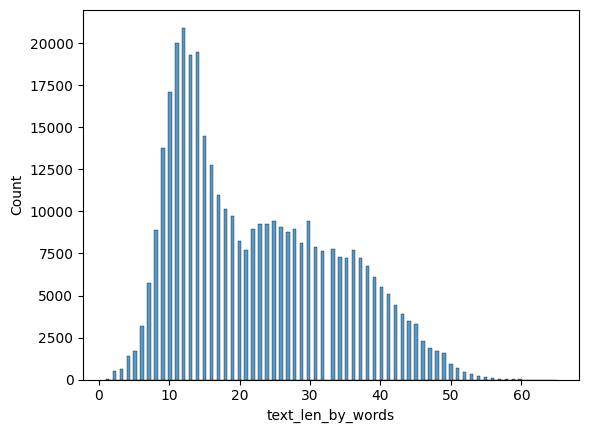

In [14]:
sns.histplot(df.text_len_by_words)

In [15]:
df.describe()

,label,text_len_by_words
count,390161.000000,390161.000000
mean,0.499886,22.398892
std,0.500001,11.350066
min,0.000000,1.000000
25%,0.000000,13.000000
50%,0.000000,20.000000
75%,1.000000,31.000000
max,1.000000,65.000000


[Text(0, 0, 'Positive'), Text(1, 0, 'Negative')]

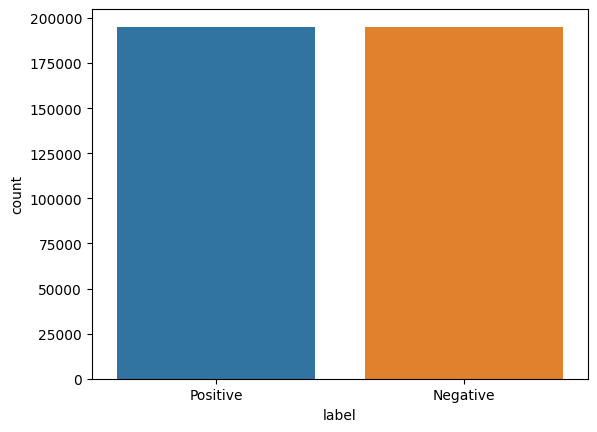

In [16]:
class_names = ['Positive', 'Negative']
ax = sns.countplot(x='label', data=df)
ax.set_xticklabels(class_names)

In [17]:
df

,text,label,text_len_by_words
0,#AI Robo-Advisers and the Future of Financial ...,1,16
1,Hackers causing havoc on Mexican banking syste...,1,10
2,CVE-2019-13127 An issue was discovered in mxGr...,1,36
3,How to protect your online identity #labourcyb...,1,10
4,Forensic Acquisition - Shadow Cyber Sec https...,1,19
...,...,...,...
399995,Attackers Test Weak Passwords in Purple Fox Ma...,0,10
399996,Aviso para los usuarios de correo de @AytoMurc...,0,19
399997,NPM had an obfuscated birthday-like easter egg...,0,21
399998,CPUの脆弱性「Spectre」に対応してAMDがリリースしたパッチに問題があることをInt...,0,5


In [18]:
df.drop(columns=['text_len_by_words'], inplace=True)

In [19]:
df

,text,label
0,#AI Robo-Advisers and the Future of Financial ...,1
1,Hackers causing havoc on Mexican banking syste...,1
2,CVE-2019-13127 An issue was discovered in mxGr...,1
3,How to protect your online identity #labourcyb...,1
4,Forensic Acquisition - Shadow Cyber Sec https...,1
...,...,...
399995,Attackers Test Weak Passwords in Purple Fox Ma...,0
399996,Aviso para los usuarios de correo de @AytoMurc...,0
399997,NPM had an obfuscated birthday-like easter egg...,0
399998,CPUの脆弱性「Spectre」に対応してAMDがリリースしたパッチに問題があることをInt...,0


## Text Preprocessing

In [20]:
class text_preprocessing:
    
    def __init__(self):
        pass

    def convert_to_lower(self, text):
        return text.lower()

    def remove_emojis(self, text):
        text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
        text = re.sub(r"<.*?>","",text)

        wierd_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emotions
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001f926-\U0001f937"
            u'\U00010000-\U0010ffff'
            u"\u200d"
            u"\u2640-\u2642"
            u"\u2600-\u2B55"
            u"\u23cf"
            u"\u23e9"
            u"\u231a"
            u"\u3030"
            u"\ufe0f"
            u"\u2069"
            u"\u2066"
            u"\u200c"
            u"\u2068"
            u"\u2067"
            "]+", flags=re.UNICODE)

        return wierd_pattern.sub(r'', text)

    def remove_html(self, text):
        html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
        return re.sub(html, '', text)

    def remove_URL(self, text):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'', text)

    def unwanted_chrs(self, text):
        text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
        text = re.sub(r'\<a href', ' ', text)
        text = re.sub(r'&amp;', '', text) 
        text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
        text = re.sub(r'<br />', ' ', text)
        text = re.sub(r'\'', ' ', text)
        return (text)


    def remove_numbers(self, text):
        number_pattern = r'\d+'
        without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
        return without_number


    def remove_punctuation(self, text):
        return text.translate(str.maketrans('', '', string.punctuation))


    def remove_extra_white_spaces(self, text):
        single_char_pattern = r'\s+[a-zA-Z]\s+'
        without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
        return without_sc

    def remove_non_ascii(self, text):
        return re.sub(r'[^\x00-\x7f]', r'', text) # ''.join([x for x in text if x in string.printable])


    def preprocessText(self, text):
        return self.remove_extra_white_spaces(self.remove_non_ascii(self.remove_URL(self.remove_html(self.remove_punctuation(self.remove_numbers(self.remove_emojis(self.convert_to_lower(self.unwanted_chrs(text)))))))))


In [21]:
# df.text = df.text.swifter.apply(lambda x: convert_to_lower(x))
# df.text = df.text.swifter.apply(lambda x: remove_emojis(x))
# df.text = df.text.swifter.apply(lambda x: remove_html(x))
# df.text = df.text.swifter.apply(lambda x: remove_URL(x))
# df.text = df.text.swifter.apply(lambda x: remove_numbers(x))
# df.text = df.text.swifter.apply(lambda x: remove_punctuation(x))
# df.text = df.text.swifter.apply(lambda x: remove_extra_white_spaces(x))

# df.text = df.text.swifter.apply(lambda x: preprocessText(x))

In [22]:
text_preprocessing_obj = text_preprocessing()

In [23]:
df.text = df.text.swifter.apply(lambda x: text_preprocessing_obj.preprocessText(x))

Pandas Apply:   0%|          | 0/390161 [00:00<?, ?it/s]

In [24]:
# df.text.tolist()

## Tokenization
Tokenization is the task of splitting into small segments

In [25]:
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

In [26]:
# Tokenizing the tweet base texts.
def tokenize(text):
    my_doc = nlp(text)
    token_list = []
    for token in my_doc:
        token_list.append(token.text)
    return token_list    

In [27]:
df.text = df.text.swifter.apply(lambda x: tokenize(x))

Pandas Apply:   0%|          | 0/390161 [00:00<?, ?it/s]

In [28]:
# df.text.tolist()

## Remove Stopwords

In [29]:
def remove_stopwords(text):    
    filtered_sentence =[] 
    for word in text:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:  # non stopwods = False , e.g future = False
            filtered_sentence.append(word) 
    return " ".join(filtered_sentence)

In [30]:
df.text = df.text.swifter.apply(lambda x: remove_stopwords(x))

Pandas Apply:   0%|          | 0/390161 [00:00<?, ?it/s]

In [31]:
# df.text.tolist()

## Stemming
 * porter - PorterStemmer()
     * snowball - LancasterStemmer()
         * Lancster - SnowballStemmer()

In [32]:
from nltk.stem.snowball import SnowballStemmer

snow_stemmer = SnowballStemmer(language='english')
  
def stemmizing(text):    
    #stem of each word
    stem_words = []
    for w in text:
        x = snow_stemmer.stem(w)
        stem_words.append(x)
    return "".join(stem_words)

In [33]:
df['text'] = df.text.swifter.apply(lambda x: stemmizing(x))

Pandas Apply:   0%|          | 0/390161 [00:00<?, ?it/s]

In [34]:
# df.text.tolist()

## Text Normalization (Lemmatization) using WordNetLemmatizer


In [35]:
# Unfortunately, spaCy has no module for stemming.
# To perform lemmatization.
# import spacy
# !pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.5/en_core_web_sm-2.2.5.tar.gz
# import en_core_web_sm


In [36]:
# import spacy
# nlp = spacy.load('en_core_web_sm')

# import en_core_web_sm
# nlp = en_core_web_sm.load()

# def lemmatizations(text):
#     doc = nlp(text)
#     lemma_word = []
#     for word in doc:
#         lemma_word.append(word.lemma_)
#     return " ".join(lemma_word)

In [37]:
# # PATTERN LEMMATIZER
# import pattern
# from pattern.en import lemma, lexeme
# from pattern.en import parse

In [38]:
# def lemmatizing(text):
#     lemma_sent = " ".join([lemma(word) for word in sentence.split()])
#     return lemma_sent

# nltk.download('wordnet')
# from nltk.stem import WordNetLemmatizer
# def word_lemmatizer(text):
#     lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
#     return lem_text
# data_clean['text_tokens_lemma'] = data_clean['text_tokens'].apply(lambda x: word_lemmatizer(x))
# data_clean.head()

In [39]:
import nltk
from nltk.stem import WordNetLemmatizer

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()

words = set(nltk.corpus.words.words())
# words = nltk.word_tokenize(corpus)

class lemmatization:
    
    def __init__(self):
        pass
    
    def lemmatizing_space(self, text):   
        return " ".join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)])

    def lemmatizing_words(self, text):
        return " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())

    def lemmatize(self, text):
        return self.lemmatizing_space(self.lemmatizing_words(text))

# 2 lst = []
# def lemmatizaing(text):
#     for w in w_tokenizer.tokenize(text):
#         lsst = lemmatizer.lemmatize(w) 
#         lst.append(lsst)
#         return " ".join(lst)

# 3
# def lemmatizaing(text):
#     lemm = nltk.stem.WordNetLemmatizer()
#     text = list(map(lambda word:list(map(lemm.lemmatize, word)), text))
#     return text

In [40]:
# import swifter
# df.text = df.text.swifter.apply(lambda x: lemmatize(x))

In [41]:
lemmatization_obj = lemmatization()

In [42]:
df.text = df.text.swifter.apply(lambda x: lemmatization_obj.lemmatize(x))

Pandas Apply:   0%|          | 0/390161 [00:00<?, ?it/s]

In [43]:
# df.text.tolist()

In [44]:
# def remove_stopwords(text):    
#     filtered_sentence =[] 
#     for word in text:
#         lexeme = nlp.vocab[word]
#         if lexeme.is_stop == False:
#             filtered_sentence.append(word) 
#     return " ".join(filtered_sentence)

In [45]:
# df.text = df.text.apply(lambda x: remove_stopwords(x))

In [46]:
df.text[4343]

'hard considering security article help'

## Visualizing the Data


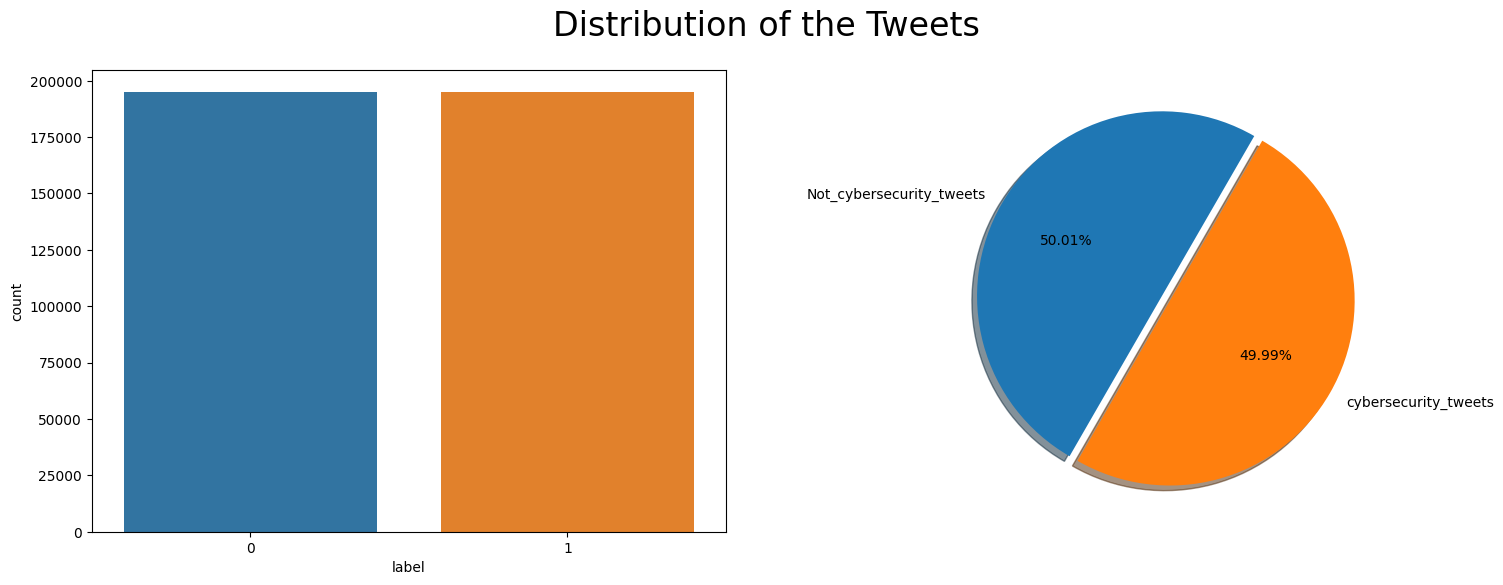

In [47]:
# Displaying target distribution.

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 6), dpi=100)
sns.countplot(x = 'label', data=df, ax=axes[0])
axes[1].pie(df.label.value_counts(),
            labels=['Not_cybersecurity_tweets', 'cybersecurity_tweets'],
            autopct='%1.2f%%',
            shadow=True,
            explode=(0.05, 0),
            startangle=60)
fig.suptitle('Distribution of the Tweets', fontsize=24)
plt.show()

## Tweet Lengths

In [48]:
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

In [49]:
# Creating a new feature for the visualization.

df['Character Count'] = df['text'].apply(lambda x: len(str(x)))

def plot_dist3(df, feature, title):
    # Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(18, 8))
    # Creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0, :2])
    # Set the title.
    ax1.set_title('Histogram')
    # plot the histogram.
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 color='#e74c3c')
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))

    # Customizing the ecdf_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title.
    ax2.set_title('Empirical CDF')
    # Plotting the ecdf_Plot.
    sns.distplot(df.loc[:, feature],
                 ax=ax2,
                 kde_kws={'cumulative': True},
                 hist_kws={'cumulative': True},
                 color='#e74c3c')
    ax2.xaxis.set_major_locator(MaxNLocator(nbins=20))
    ax2.set(ylabel='Cumulative Probability')

    # Customizing the Box Plot.
    ax3 = fig.add_subplot(grid[:, 2])
    # Set title.
    ax3.set_title('Box Plot')
    # Plotting the box plot.
    sns.boxplot(x=feature, data=df, orient='v', ax=ax3, color='#e74c3c')
    ax3.yaxis.set_major_locator(MaxNLocator(nbins=25))

    plt.suptitle(f'{title}', fontsize=24)

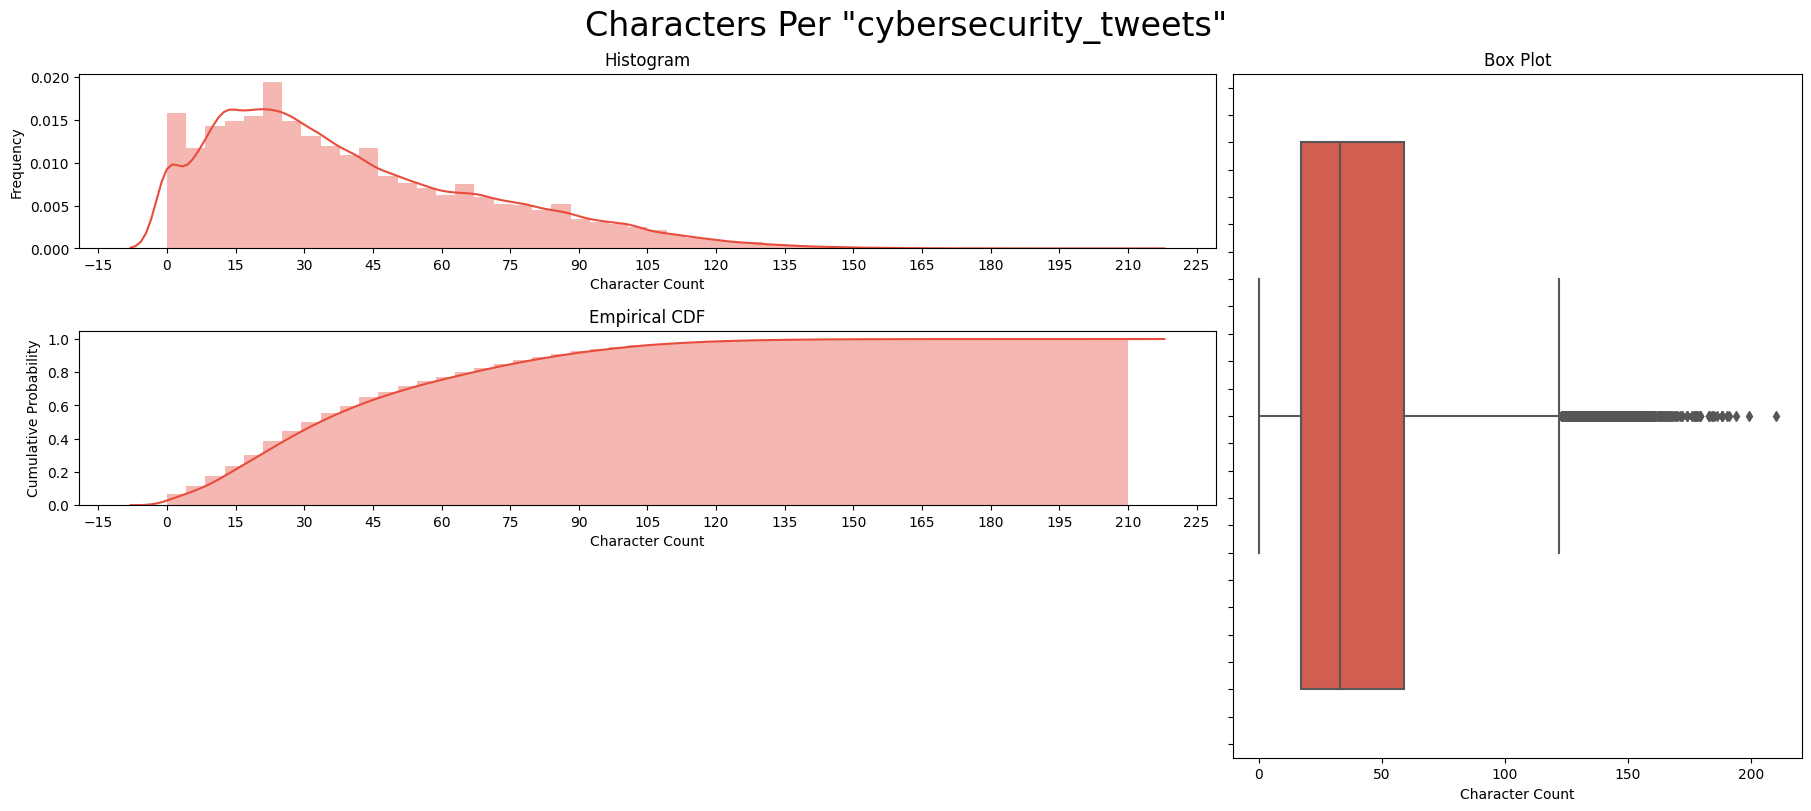

In [50]:
plot_dist3(df[df.label == 1], 'Character Count',
           'Characters Per "cybersecurity_tweets"')

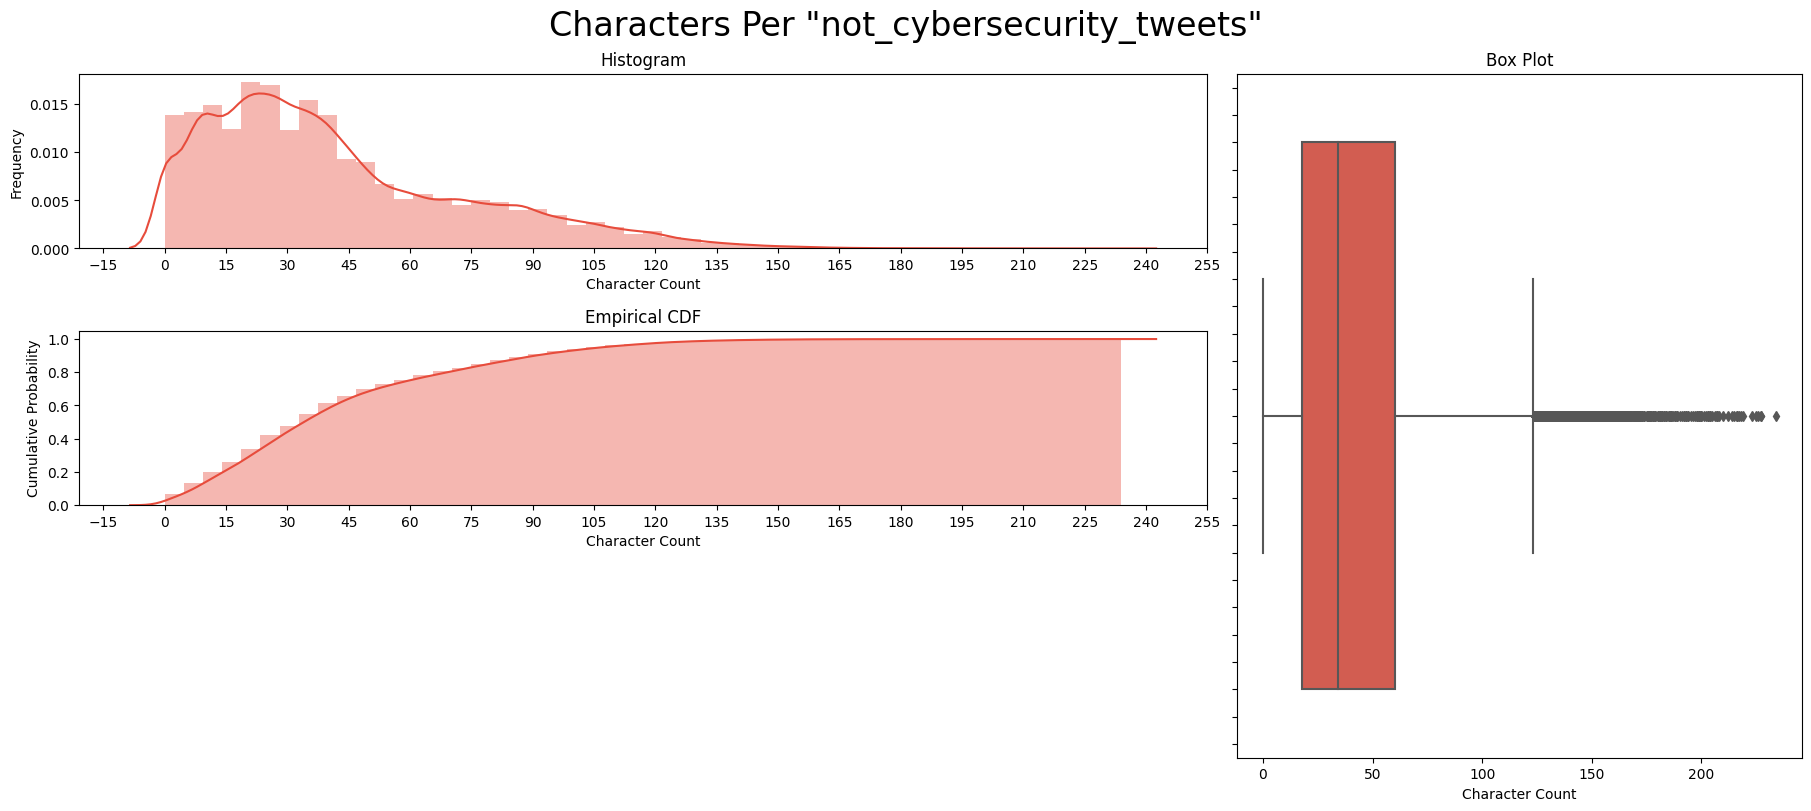

In [51]:
plot_dist3(df[df.label == 0], 'Character Count',
           'Characters Per "not_cybersecurity_tweets"')

In [52]:
df.label.value_counts()

0    195125
1    195036
Name: label, dtype: int64

In [53]:
df

,text,label,Character Count
0,ai future financial advice,1,26
1,causing havoc banking system,1,28
2,issue discovered related,1,24
3,protect identity,1,16
4,forensic acquisition shadow sec,1,31
...,...,...,...
399995,test weak purple fox,0,20
399996,aviso para de de con,0,20
399997,birthday like easter egg mistaken think,0,39
399998,,0,0


In [54]:
df.drop(columns=['Character Count'], inplace=True)

In [55]:
df

,text,label
0,ai future financial advice,1
1,causing havoc banking system,1
2,issue discovered related,1
3,protect identity,1
4,forensic acquisition shadow sec,1
...,...,...
399995,test weak purple fox,0
399996,aviso para de de con,0
399997,birthday like easter egg mistaken think,0
399998,,0


## TextBlob 

* Spelling correction

In [56]:
# Applying TextBlob on our data set - Spelling correction

from textblob import TextBlob

In [57]:
# Taking too much time
# df.text = df['text'].apply(lambda x: str(TextBlob(x).correct()))

In [58]:
# df.text.tolist()

In [59]:
# FOR REMOVING OTHER LANGUAGE

# def remove_lang(text):
# #     res = [idx for idx in text if not re.findall("[^\u0000-\u05C0\u2100-\u214F]+", idx)]
#     res = list(filter(lambda ele: re.search("[a-zA-Z\s]+", ele) is not None, text))
#     return "".join(res)

# # # # using search() to get only those strings with alphabets
# # # # res = list(filter(lambda ele: re.search("[a-zA-Z\s]+", ele) is not None, test_list))

# df.text = df.text.swifter.apply(lambda x: remove_lang(x))

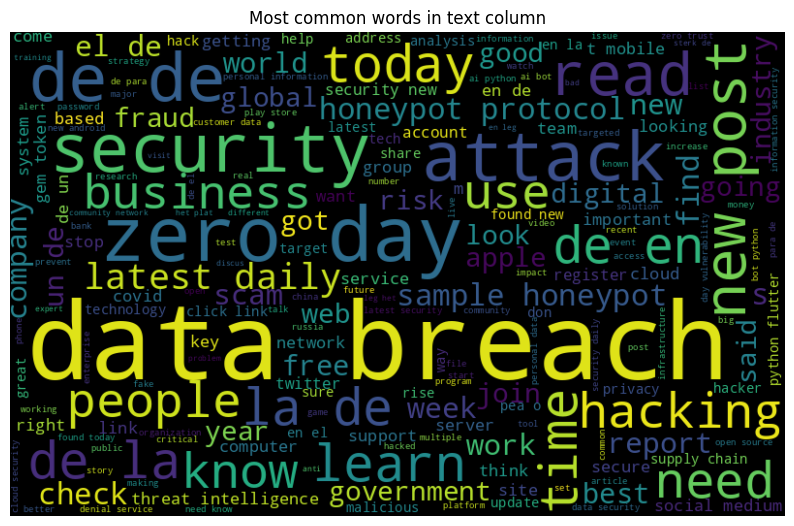

In [60]:
# visualizing all the words in column "text" in our data using the word cloud plot

all_words = ' '.join([text for text in df['text']])

from wordcloud import WordCloud

wc = WordCloud(width=800, height=500, random_state=2529, max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Most common words in text column")
plt.show()

In [61]:
# df.text.tolist()

## Extracting Features from Cleaned Tweets:
 # Text Feature Extraction:
         * Weighted Words - Bag of words(BoW)- Bag of n-grams
             * Frequency Vectors - CountVectorizer
                 * Term Frequency-Inverse Document Frequency(TF-IDF)

## A. bag- of-words-features

In [62]:
# Importing library
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df = 0.97, min_df = 2, max_features=1000, stop_words='english')
bow_vectorizer

CountVectorizer(max_df=0.97, max_features=1000, min_df=2, stop_words='english')

In [63]:
# bag-of-words feature matrix - For columns "combine_df['tweet_stemmed']"
bow_stem = bow_vectorizer.fit_transform(df.text)
bow_stem

<390161x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 1609075 stored elements in Compressed Sparse Row format>

## B. TF-IDF features

In [64]:
# Importing library
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf_vectorizer

TfidfVectorizer(max_df=0.9, max_features=1000, min_df=2, stop_words='english')

In [65]:
# TF-IDF feature matrix - For columns "combine_df['tweet_stemmed']"
tfidf_stem = tfidf_vectorizer.fit_transform(df.text)
tfidf_stem

<390161x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1609075 stored elements in Compressed Sparse Row format>

In [66]:
# df.text.tolist()

## Logistic Regression Model Building: Twitter Sentiment Analysis

In [67]:
# Importing Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [68]:
# A.1 For columns "df['tweet_Text']"
# test_bow = bow_stem[31962:,:]
# train_bow, df['label']

train_tfidf = tfidf_stem[:,:]
train_bow = bow_stem[:,:]

# X = df[['text']]
y = df['label']

# splitting data into training and validation set
Xtrain, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, y, random_state = 2529, test_size=0.23)

# print(Xtrain.shape, xvalid_bow.shape, ytrain.shape, yvalid.shape)

lreg = LogisticRegression()
lreg.fit(Xtrain, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.8 # if prediction is greater than or equal to 0.8 than 1 else 0
prediction_int1 = prediction_int.astype(np.int)

A1 = f1_score(yvalid, prediction_int) # calculating f1 score
print("Bag of Word Model \n F1-Score : ",A1)

Bag of Word Model 
 F1-Score :  0.4659476930180403


In [69]:
print(prediction[0])
print(prediction_int)
print(prediction_int1)

[0.03164734 0.96835266]
[ True False False ... False False  True]
[1 0 0 ... 0 0 1]


In [70]:
data = ['Time to Pursue an International Cyber Treaty? | The Nation https://t.co/PPnXQ8XgJM #CyberSecurity #infosec #treaty #international']

bow = bow_vectorizer.transform(data)

In [71]:
prediction = lreg.predict_proba(bow)

In [72]:
prediction

array([[0.24309527, 0.75690473]])

In [73]:
xvalid_bow.reshape(-1, 1)

<89738000x1 sparse matrix of type '<class 'numpy.int64'>'
	with 370038 stored elements in COOrdinate format>

## Word Embedding
# Basic Word Embedding
    * Global Vectors for Word represntation(Glove)
        * Word2vec
            * fastText
# Advance Word Embedding
    * Bert

In [74]:
## Tokenizer

In [75]:
# BERT base model (cased)

# AutoTokenizer. This is a generic tokenizer class that will be 
# instantiated as one of the tokenizer classes of the library when 
# created with the AutoTokenizer. from_pretrained() class method. 

from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

ModuleNotFoundError: No module named 'transformers'

In [ ]:
# tokens = tokenizer.tokenize(df.text)
max_len = []
for sent in df.text:
    tokens = tokenizer.tokenize(sent)
    max_len.append(token_ids)

In [ ]:
df.text[0]

In [ ]:
token_ids

In [ ]:
# df.label = df.label.replace({'Positive':1, 'Negative':0})